Importação das bibliotecas

In [5]:
import os
import random
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [2]:
root = 'PetImages'
train_split, val_split = 0.7, 0.15

categories = [x[0] for x in os.walk(root) if x[0]][1:]

print(categories)

['PetImages\\Cat', 'PetImages\\Dog']


In [3]:
#pre-processamento dos dados em uma imagem e um vetor
def get_image(path):
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

Carregamento das imagens e ignorando as invalídas.

In [ ]:
#Carregando todas as imagens
dados = []
for c, categoria in enumerate(categories):
    images = [os.path.join(dp, f) for dp, dn, filenames
              in os.walk(categoria) for f in filenames
              if os.path.splitext(f)[1].lower() in ['.jpg', '.png', '.jpeg']]
    for img_path in images:
        try:
            img, x = get_image(img_path)
            dados.append({'x': np.array(x[0]), 'y': c})
        except Exception as e:
            print(f"Ignorando arquivo inválido: {img_path} -> {e}")
            continue

num_class = len(categories)

Ignorando arquivo inválido: PetImages\Cat\666.jpg -> cannot identify image file <_io.BytesIO object at 0x00000290C00B5D50>
Ignorando arquivo inválido: PetImages\Dog\11702.jpg -> cannot identify image file <_io.BytesIO object at 0x00000290C0167420>


In [6]:
#Embaralhando os dados
random.shuffle(dados)

Preparando os valores para o treinamento

In [7]:
index_val = int(train_split * len(dados))
index_teste = int((train_split + val_split) * len(dados))
train = dados[:index_val]
val = dados[index_val:index_teste]
teste = dados[index_teste:]

In [8]:
x_train, y_train = np.array([t["x"] for t in train]), [t["y"] for t in train]
x_val, y_val = np.array([t["x"] for t in val]), [t["y"] for t in val]
x_test, y_test = np.array([t["x"] for t in teste]), [t["y"] for t in teste]
print(y_test)

[1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 

In [9]:
# garantindo que os valores são float32
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# converte labels em valores 0 e 1
y_train = keras.utils.to_categorical(y_train, num_class)
y_val = keras.utils.to_categorical(y_val, num_class)
y_test = keras.utils.to_categorical(y_test, num_class)
print(y_test.shape)

(3750, 2)


In [10]:
print("carregamento finalizados %d imagens de %d categorias"%(len(dados), num_class))
print("treino / validação / teste: %d, %d, %d"%(len(x_train), len(x_val), len(x_test)))
print("treino data shape: ", x_train.shape)
print("treino labels shape: ", y_train.shape)

carregamento finalizados 24998 imagens de 2 categorias
treino / validação / teste: 17498, 3750, 3750
treino data shape:  (17498, 224, 224, 3)
treino labels shape:  (17498, 2)


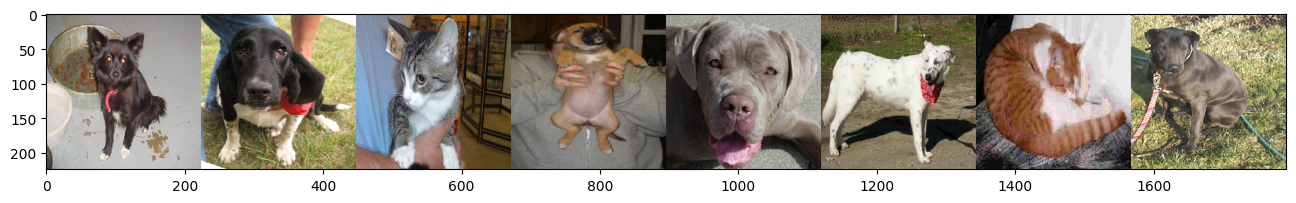

In [11]:
images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(root) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
index = [int(len(images) * random.random()) for i in range(8)]
imgs = [image.load_img(images[i], target_size=(224, 224)) for i in index]
concat_image = np.concatenate([np.asarray(img) for img in imgs], axis=1)
plt.figure(figsize=(16,4))
plt.imshow(concat_image)

Treinamento de uma rede neural do zero

In [32]:
model = Sequential()
print("Dimensão do input: ",x_train.shape[1:])

model.add(Conv2D(32, (3, 3), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(num_class))
model.add(Activation('softmax'))

model.summary()

Dimensão do input:  (224, 224, 3)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 109, 109, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 52, 52, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 52, 52, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │           514 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,209,058 (4.61 MB)

 Trainable params: 1,209,058 (4.61 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    validation_data=(x_val, y_val))

Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 127s 900ms/step - accuracy: 0.5817 - loss: 0.6645 - val_accuracy: 0.6872 - val_loss: 0.5728
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 116s 844ms/step - accuracy: 0.7092 - loss: 0.5573 - val_accuracy: 0.7421 - val_loss: 0.5165
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 117s 846ms/step - accuracy: 0.7548 - loss: 0.5041 - val_accuracy: 0.8029 - val_loss: 0.4304
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 117s 849ms/step - accuracy: 0.7916 - loss: 0.4415 - val_accuracy: 0.8147 - val_loss: 0.4012
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 120s 875ms/step - accuracy: 0.8202 - loss: 0.3966 - val_accuracy: 0.8189 - val_loss: 0.3970
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 117s 847ms/step - accuracy: 0.8401 - loss: 0.3596 - val_accuracy: 0.8155 - val_loss: 0.4016
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 118s 853ms/step - accuracy: 0.8592 - loss: 0.3167 - val_accuracy: 0.8632 - val_loss: 0.3308
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 117s 848ms/step - accuracy: 0.8747 -

(0.0, 1.0)

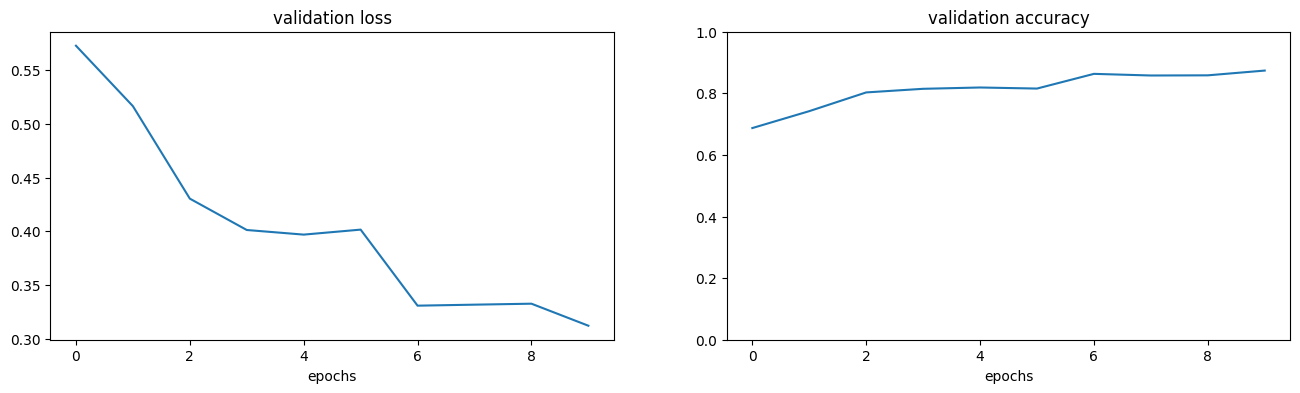

In [14]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

In [15]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Teste loss:', loss)
print('Teste accuracy:', accuracy)

Teste loss: 0.3177667260169983
Teste accuracy: 0.8754666447639465


Treinamento com uma rede neural ja existente

In [16]:
vgg = keras.applications.VGG16(weights='imagenet', include_top=True)
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
input = vgg.input

#cria uma nova camada softmax com os neuronios num_class
nova_classificacao = Dense(num_class, activation='softmax')

#conecta a nova coamada com a penultima camada do VGG e referencia isso
output = nova_classificacao(vgg.layers[-2].output)

novo_modelo = Model(input, output)

In [18]:
#faz com que todas as camadas não sejam treinaveis menos a ultima
for l, layer in enumerate(novo_modelo.layers[:-1]):
    layer.trainable = False

#garantir que a ultima camada possa ser treinada
for l, layer in enumerate(novo_modelo.layers[-1:]):
    layer.trainable = True

novo_modelo.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

novo_modelo.summary()

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,268,738 (512.19 MB)

 Trainable params: 8,194 (32.01 KB)

 Non-trainable params: 134,260,544 (512.16 MB)

In [19]:
history2 = novo_modelo.fit(x_train, y_train,
                         batch_size=128,
                         epochs=10,
                         validation_data=(x_val, y_val))

Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 1428s 10s/step - accuracy: 0.7202 - loss: 0.5737 - val_accuracy: 0.8968 - val_loss: 0.2755
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 1774s 13s/step - accuracy: 0.9037 - loss: 0.2582 - val_accuracy: 0.9040 - val_loss: 0.2323
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 1929s 14s/step - accuracy: 0.9094 - loss: 0.2267 - val_accuracy: 0.8981 - val_loss: 0.2297
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 1393s 10s/step - accuracy: 0.9129 - loss: 0.2077 - val_accuracy: 0.9179 - val_loss: 0.2036
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 1251s 9s/step - accuracy: 0.9191 - loss: 0.1994 - val_accuracy: 0.9192 - val_loss: 0.2001
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 1253s 9s/step - accuracy: 0.9204 - loss: 0.1910 - val_accuracy: 0.9237 - val_loss: 0.1912
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 1245s 9s/step - accuracy: 0.9240 - loss: 0.1813 - val_accuracy: 0.9235 - val_loss: 0.1901
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 1240s 9s/step - accuracy: 0.9252 - loss: 0.182

Comparação dos valores entre a rede neural do zero e a rede neural ja existente

(0.0, 1.0)

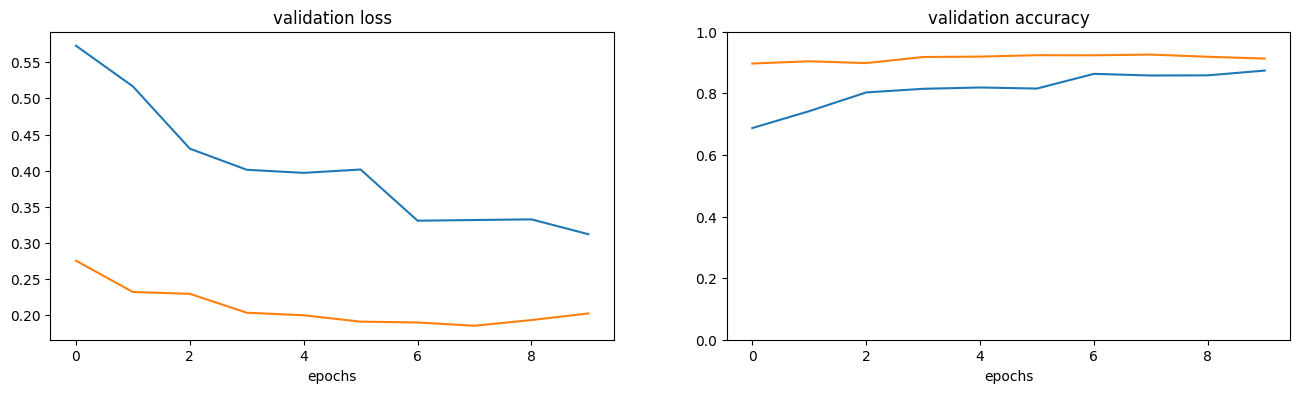

In [20]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.plot(history2.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.plot(history2.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

In [21]:
loss, accuracy = novo_modelo.evaluate(x_test, y_test, verbose=0)

print('Teste loss:', loss)
print('Teste accuracy:', accuracy)

Teste loss: 0.17831484973430634
Teste accuracy: 0.9247999787330627


Predict

In [22]:
probabilities = novo_modelo.predict(x_test)
print(probabilities)

118/118 ━━━━━━━━━━━━━━━━━━━━ 229s 2s/step
[[2.8888786e-05 9.9997115e-01]
 [5.6745553e-01 4.3254441e-01]
 [7.8238875e-01 2.1761125e-01]
 ...
 [9.9576735e-01 4.2325999e-03]
 [9.5082837e-01 4.9171705e-02]
 [9.8872149e-01 1.1278430e-02]]


Matriz de Confusão

Relatório de métricas:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1861
           1       0.97      0.87      0.92      1889

    accuracy                           0.92      3750
   macro avg       0.93      0.93      0.92      3750
weighted avg       0.93      0.92      0.92      3750



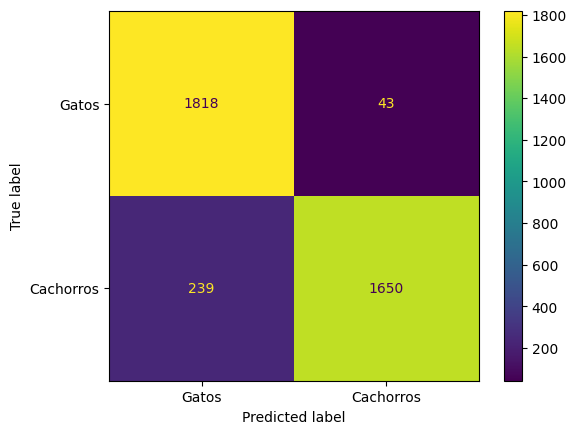

In [26]:
y_pred=np.argmax(probabilities, axis=1)
y_test=np.argmax(y_test, axis=1)

print("Relatório de métricas:")
print(classification_report(y_test, y_pred))
matriz = confusion_matrix(y_test, y_pred)
matriz_dt = ConfusionMatrixDisplay(matriz, display_labels=["Gatos", "Cachorros"])
matriz_dt.plot(values_format="d")
plt.show()

In [30]:
VP = matriz[0][0]
FP = matriz[0][1]
FN = matriz[1][0]
VN = matriz[1][1]

sensibilidade = VP/(VP + FN)
especificidade = VN/(FP + VN)
acuracia = (VP + VN)/(VP + VN + FP + FN)
precisao = VP/(VP + FP)
f_score = 2*((precisao*sensibilidade)/(precisao+sensibilidade))

print(sensibilidade)
print(especificidade)
print(acuracia)
print(precisao)
print(f_score)


0.8838113757899854
0.9746012994683992
0.9248
0.9768941429339065
0.9280245022970903
